In [1]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt


In [2]:
scale = 102.3
bitlength = 10
population = []
population_size = 10
roulette = [
    0,0,0,0,0,0,0,0,0,0,
    1,1,1,1,1,1,1,1,1,
    2,2,2,2,2,2,2,2,
    3,3,3,3,3,3,3,
    4,4,4,4,4,4,
    5,5,5,5,5,
    6,6,6,6,
    7,7,7,
    8,8,
    9
]
rulette_size = len(roulette)

In [3]:
def f(x):
    return (math.sin(x) * math.sin(0.4 * x) * math.sin(3.0 * x))

In [4]:
x = np.linspace(0,10,100)
y = [f(i) for i in x]

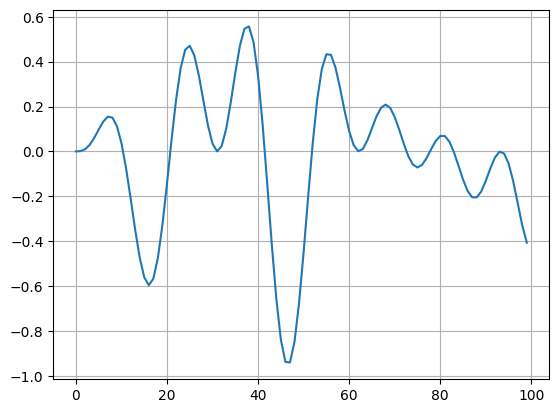

In [5]:
plt.grid()
plt.plot(y)


In [6]:
def makePopulation(size, length):
    
    for p in range(size):
        bits = ''
        for l in range(length):
            bits = bits + str(random.randint(0,1))
        population.append([bits,0.0])
    


In [7]:
def fitness(bits):
    x = int(bits,2)/scale
    return f(x)
    

In [8]:
def evaluate(population, func):
    for x in range(population_size):
        population[x][1] = func(population[x][0])
        


In [9]:
def byFitness(item):
    return item[1]
    
def sort(population):
    population.sort(key=byFitness, reverse = True)

In [10]:
def selectparents(population):
    p1 = random.randint(0, rulette_size-1)
    p2 = random.randint(0, rulette_size-1)

    while(roulette[p1] == roulette[p2]):
         p1 = random.randint(0, rulette_size-1)
         p2 = random.randint(0, rulette_size-1)

    return [roulette[p1], roulette[p2]]

In [11]:
def crossover(parent1, parent2):
    locus = random.randint(0, bitlength - 1)
    left = parent1[0][0:locus]
    right =parent2[0][locus:]
    offspring = left + right
    return [offspring, 0.0]


In [12]:
def mutate(offspring, rate):
    bits = list(offspring[0])
    numflips =int(bitlength * rate)
    flips = random.sample(range(bitlength), numflips)
    for x in range(numflips):
        if (bits[flips[x]] == '1'):
            bits[flips[x]] = '0'
        else:
            bits[flips[x]] = '1'

    return [''.join(bits), offspring[1]]

In [13]:
def evolve(population, generations):
    for generation in range(generations):
        parents = selectparents(population)
        offspring = crossover(population[parents[0]],population[parents[1]])
        offspring = mutate(offspring, 0.4)
        population[population_size-1] = offspring
        evaluate(population, fitness)
        sort(population)

makePopulation(10, 10)

evolve(population, 1000)   

population[0]

['0110000011', 0.5604107216888747]